### This notebook is created for ds assessment by Random Walk AI and written by [Avinash Changrani](https://github.com/nabobery/)

In [39]:
# import the required libraries
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# import the dataset books.csv
df = pd.read_csv('books.csv')

# print the first 5 rows of the dataset
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


 Q1: How many rows and columns are there in books.csv dataset?

In [41]:
# get the shape of dataset
shape = df.shape

print("Number of rows: ", shape[0])

print("Number of columns: ", shape[1])

Number of rows:  399
Number of columns:  24


In [42]:
# print all the columns of the dataset
print(df.columns)

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'NonEnglish'],
      dtype='object')


 Q2: How many books do not have an original title?

In [43]:
# print the number of rows which don't have an original_title

print("Number of rows without original_title: ", df['original_title'].isnull().sum())

Number of rows without original_title:  36


Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [44]:
# remove the rows which don't have an original_title
df_cleaned = df.dropna(subset=['original_title'])

# number of unique books in the dataset based on book_id
print("Number of unique books: ", df_cleaned['book_id'].nunique())

Number of unique books:  363


Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [45]:
# average rating of all books based on the column average_rating
print("Average rating of all books: ", df['average_rating'].mean())

Average rating of all books:  3.9837844611528817


Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [46]:
# number of books published in year 2000  based on original_publication_year
print("Number of books published in year 2000: ", df[df['original_publication_year'] == 2000].shape[0])

Number of books published in year 2000:  8


Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [47]:
# print the book row which has the maximum number of ratings based on the column work_ratings_count
book = df[df['work_ratings_count'] == df['work_ratings_count'].max()]

#print(book)

# print the book title
print("Book title with maximum number of ratings: ", book['title'].values[0])

Book title with maximum number of ratings:  The Diary of a Young Girl


Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

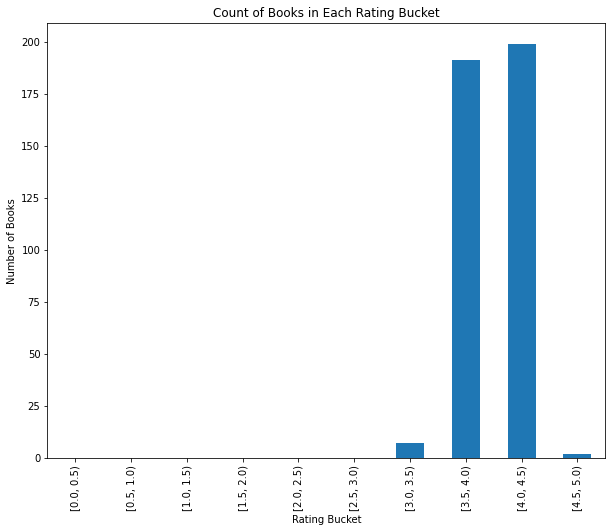

In [48]:
buckets = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4 , 4.5, 5]

# plot the histogram of average_rating column count for each bucket by rounding off the average_rating column to the nearest bucket
df['Rating Bucket'] = pd.cut(df['average_rating'], bins=buckets, right=False)

bucket_counts = df.groupby('Rating Bucket').size()

# Plot the bar graph
plt.figure(figsize=(10, 8))
bucket_counts.plot(kind='bar')
plt.title('Count of Books in Each Rating Bucket')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.show()